# Absolute vs. Relative Frequency

## Example 1. Demonstrate data wrangling, and plot a horizontal bar chart.

## Example 1 - Step 1. Make the necessary import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:

# Read the data from a CSV file

pokemon = pd.read_csv("pokemon.csv")
pokemon.head()
# print(pokemon.shape)
# pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Last time we created the bar chart of pokemon by their type_1. Let's club the rows of both type_1 and type_2, so that the resulting dataframe has new column, type_level.

This operation will double the number of rows in pokemon from 807 to 1614.

## Data Wrangling Step
We will use the pandas.DataFrame.melt() method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set. The syntax is:

In [3]:
# DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

It is essential to understand the parameters involved:

    id_vars - It is a tuple representing the column(s) to use as identifier variables.
    value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
    var_name - It is a name of the new column.
    value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.


The function below will do the following in the pokemon dataframe out of place:

    Select the 'id', and 'species' columns from pokemon.
    Remove the 'type_1', 'type_2' columns from pokemon
    Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
    Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having id=1 and species=bulbasaur will now occur twice in the resulting dataframe after the melt() operation. The first occurrence will have type=grass, whereas, the second occurrence will have type=poison.

## Example 1 - Step 2. Data wrangling to reshape the pokemon dataframe

In [4]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')

In [5]:
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [6]:
pkmn_types.tail(10)
# pkmn_types.shape


,id,species,type_level,type
1604,798,kartana,type_2,steel
1605,799,guzzlord,type_2,dragon
1606,800,necrozma,type_2,NaN
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1609,803,poipole,type_2,NaN
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost
1613,807,zeraora,type_2,NaN


## Example 1 - Step 3. Find the frequency of unique values in the type column

In [7]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe.
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [8]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

## Example 1 - Step 4. Plot the horizontal bar charts

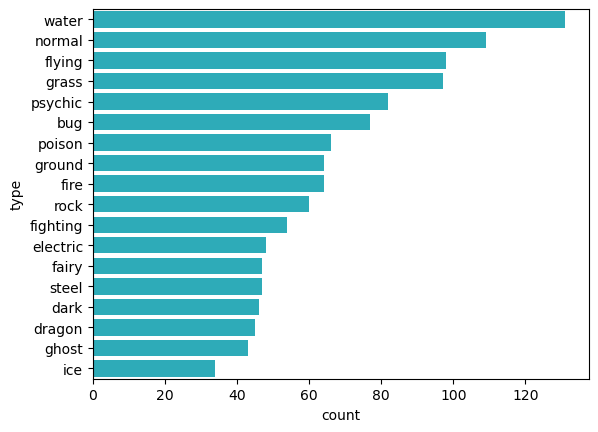

In [9]:
base_color = sb.color_palette()[9]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

## Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

## Example 2 - Step 1. Find the maximum proportion of bar

In [10]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
n_pokemon

1212

In [11]:

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
max_type_count

131

In [12]:

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


## Example 2 - Step 2. Create an array of evenly spaced proportioned values

In [13]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with plt.xticks() function.

## Example 2 - Step 3. Create a list of String values that can be used as tick labels.

In [14]:
# Use a list comprehension to create tick_names that we will apply to the tick labels.
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.




## Example 2 - Step 4. Plot the bar chart, with new x-tick labels

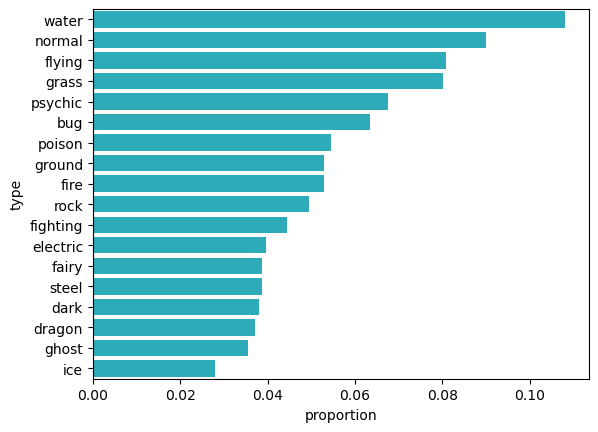

In [15]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

## Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

## Example 3. Print the text (proportion) on the bars of a horizontal plot.

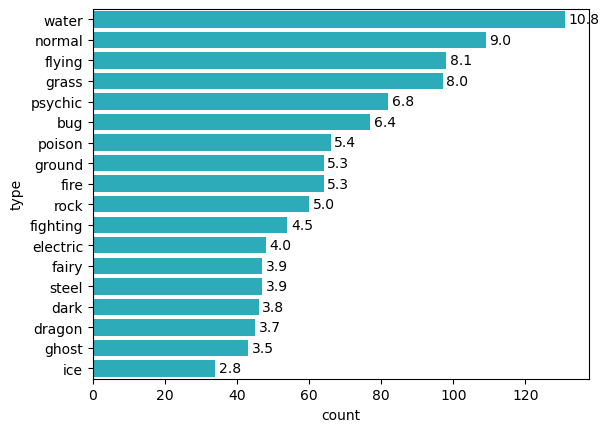

In [16]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar.
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

## Example 4. Print the text (proportion) below the bars of a Vertical plot.

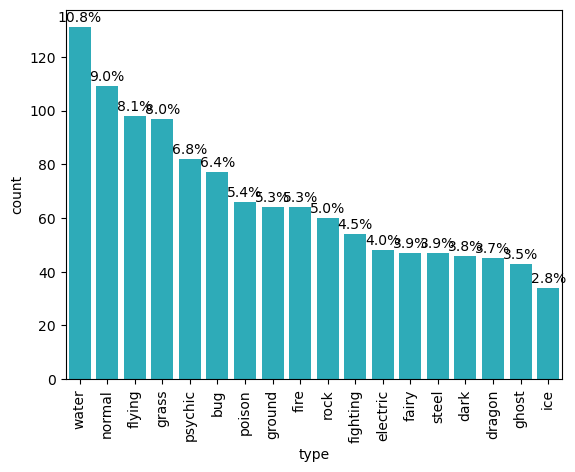

In [17]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just above the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

I use the .get_text() method to obtain the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

Tip - Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

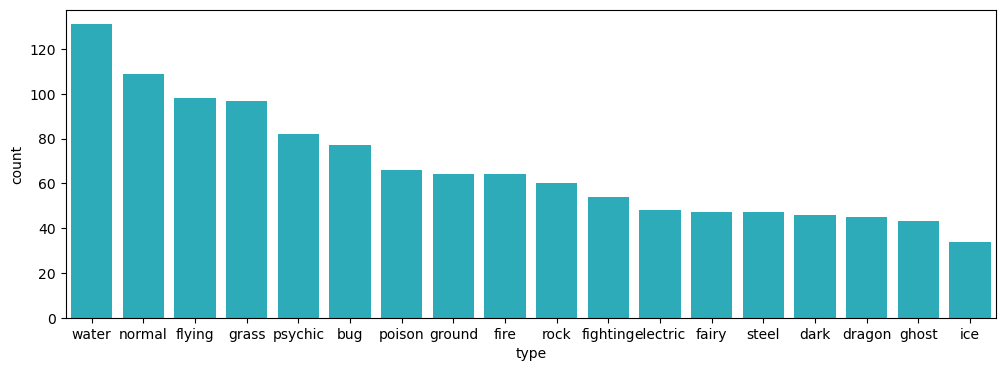

In [18]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
